In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Activation,LSTM

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np

In [4]:
data_hdfc= pd.read_csv("AMZN_5.csv", parse_dates = True, index_col=0)

In [5]:
data5 = pd.read_csv("AMZN_5.csv", usecols = [5])

In [6]:
data5.shape

(1258, 1)

In [7]:
data5.head()

,Adj Close
0,398.790009
1,397.970001
2,396.440002
3,393.630005
4,398.029999


In [8]:
data_hdfc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,394.579987,398.829987,393.799988,398.790009,398.790009,1996500
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000


In [9]:
data_hdfc['MA'] = data_hdfc['Close'].rolling(window=14).mean()
data_hdfc['EMA'] = data_hdfc['Close'].ewm(span=14, adjust=False).mean()

In [10]:
data_hdfc['oc'] = (data_hdfc['Close']-data_hdfc['Open'])/data_hdfc['Open']
data_hdfc['oh'] = (data_hdfc['High']-data_hdfc['Open'])/data_hdfc['Open']
data_hdfc['ol'] = (data_hdfc['Low']-data_hdfc['Open'])/data_hdfc['Open']
data_hdfc['ch'] = (data_hdfc['High']-data_hdfc['Close'])/data_hdfc['Close']
data_hdfc['cl'] = (data_hdfc['Low']-data_hdfc['Close'])/data_hdfc['Close']
data_hdfc['lh'] = (data_hdfc['High']-data_hdfc['Low'])/data_hdfc['Low']


In [11]:
data_hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,MA,EMA,oc,oh,ol,ch,cl,lh
Date,,,,,,,,,,,,,,
2013-12-31,394.579987,398.829987,393.799988,398.790009,398.790009,1996500,NaN,398.790009,0.010670,0.010771,-0.001977,0.000100,-0.012513,0.012773
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800,NaN,398.680675,-0.002081,0.001404,-0.011986,0.003493,-0.009925,0.013553
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200,NaN,398.381918,-0.004645,0.011097,-0.005197,0.015816,-0.000555,0.016380
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600,NaN,397.748330,-0.005608,0.002905,-0.018770,0.008561,-0.013236,0.022089
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000,NaN,397.785886,0.007569,0.008683,-0.001899,0.001105,-0.009396,0.010601


In [12]:
data_hdfc = data_hdfc[14:]

In [13]:
data_hdfc.drop('Volume',axis=1, inplace=True)

In [14]:
data_hdfc.head()

,Open,High,Low,Close,Adj Close,MA,EMA,oc,oh,ol,ch,cl,lh
Date,,,,,,,,,,,,,
2014-01-22,408.000000,408.059998,402.000000,404.540009,404.540009,398.432144,399.505300,-0.008480,0.000147,-0.014706,0.008701,-0.006279,0.015075
2014-01-23,401.000000,406.170013,397.790009,399.869995,399.869995,398.567858,399.553926,-0.002818,0.012893,-0.008005,0.015755,-0.005202,0.021066
2014-01-24,398.160004,400.200012,387.269989,387.600006,387.600006,397.936430,397.960070,-0.026522,0.005124,-0.027351,0.032508,-0.000851,0.033388
2014-01-27,390.500000,394.100006,380.489990,386.279999,386.279999,397.411429,396.402727,-0.010807,0.009219,-0.025634,0.020244,-0.014989,0.035770
2014-01-28,387.399994,394.739990,387.119995,394.429993,394.429993,397.154286,396.139696,0.018147,0.018947,-0.000723,0.000786,-0.018533,0.019684


In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
from numpy import array , hstack

In [17]:
data1 = data_hdfc[['Open','High','Low','MA','EMA','Close']]

In [18]:
data1.head()

,Open,High,Low,MA,EMA,Close
Date,,,,,,
2014-01-22,408.000000,408.059998,402.000000,398.432144,399.505300,404.540009
2014-01-23,401.000000,406.170013,397.790009,398.567858,399.553926,399.869995
2014-01-24,398.160004,400.200012,387.269989,397.936430,397.960070,387.600006
2014-01-27,390.500000,394.100006,380.489990,397.411429,396.402727,386.279999
2014-01-28,387.399994,394.739990,387.119995,397.154286,396.139696,394.429993


In [19]:
data2 = data_hdfc[['oc','oh','ol','ch','cl','lh']]

In [20]:
data1 = scaler.fit_transform(data1)

In [21]:
data1.shape

(1244, 6)

In [22]:
type(data2)

pandas.core.frame.DataFrame

In [23]:
data2 = data2.values

In [24]:
type(data2)

numpy.ndarray

In [25]:
data1.shape

(1244, 6)

In [26]:
data2.shape

(1244, 6)

In [27]:
data = hstack((data2,data1))

In [28]:
data.shape

(1244, 12)

In [29]:
data1

array([[0.07047916, 0.06683786, 0.06824754, 0.06041628, 0.06176663,
        0.06709613],
       [0.06648762, 0.06576406, 0.06581261, 0.060497  , 0.06179566,
        0.06443145],
       [0.0648682 , 0.06237216, 0.05972816, 0.06012144, 0.06084409,
        0.05743027],
       ...,
       [0.61839758, 0.67198084, 0.62406594, 0.74732706, 0.73012243,
        0.67555462],
       [0.66704299, 0.66961729, 0.63985544, 0.73723517, 0.72555744,
        0.67027092],
       [0.67796271, 0.69488317, 0.67379988, 0.73081552, 0.722905  ,
        0.67961725]])

In [30]:
data2

array([[-0.00848037,  0.00014705, -0.01470588,  0.00870121, -0.00627876,
         0.01507462],
       [-0.00281797,  0.0128928 , -0.00800497,  0.01575517, -0.00520166,
         0.0210664 ],
       [-0.026522  ,  0.00512359, -0.02735085,  0.03250775, -0.00085144,
         0.03338762],
       ...,
       [ 0.07452024,  0.07617122, -0.00429545,  0.00153648, -0.07334966,
         0.0808138 ],
       [ 0.00511626,  0.01017745, -0.04393474,  0.00503543, -0.04880132,
         0.05659884],
       [ 0.00316968,  0.02723046, -0.01652695,  0.02398476, -0.01963439,
         0.04449273]])

In [31]:
data

array([[-8.48037010e-03,  1.47053922e-04, -1.47058824e-02, ...,
         6.04162778e-02,  6.17666307e-02,  6.70961320e-02],
       [-2.81796758e-03,  1.28928005e-02, -8.00496509e-03, ...,
         6.04969958e-02,  6.17956616e-02,  6.44314506e-02],
       [-2.65219959e-02,  5.12358846e-03, -2.73508511e-02, ...,
         6.01214440e-02,  6.08440937e-02,  5.74302701e-02],
       ...,
       [ 7.45202375e-02,  7.61712175e-02, -4.29545466e-03, ...,
         7.47327060e-01,  7.30122434e-01,  6.75554625e-01],
       [ 5.11625928e-03,  1.01774512e-02, -4.39347367e-02, ...,
         7.37235168e-01,  7.25557436e-01,  6.70270920e-01],
       [ 3.16967732e-03,  2.72304582e-02, -1.65269463e-02, ...,
         7.30815525e-01,  7.22905002e-01,  6.79617251e-01]])

In [32]:
data.shape

(1244, 12)

In [33]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):

		end_ix = i + n_steps

		if end_ix > len(sequences):
			break

		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [34]:
n_steps = 3
X, y = split_sequences(data, n_steps)
n_features = X.shape[2]
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [35]:
idx = np.arange(1,len(data)+1,1)

In [36]:
train_data = int(len(data)*0.7)
test_data = len(data)-train_data

In [37]:
train_data, test_data = data[0:train_data,:], data[train_data:len(data),:]

In [38]:
n_steps = 3
# convert into input/output
trainx, trainy = split_sequences(train_data, n_steps)

In [39]:
testx, testy = split_sequences(test_data, n_steps)

In [40]:
n_features = trainx.shape[2]

In [41]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trainx, trainy, epochs=50, verbose=0)

In [42]:
train_predict = model.predict(trainx)
test_predict = model.predict(testx)

In [43]:
train_predict.shape

(868, 1)

In [44]:
test_predict.shape

(372, 1)

In [45]:
data6 = scaler.fit_transform(data5)

In [46]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [47]:
train_predict

array([[ 389.1033 ],
       [ 384.68173],
       [ 391.33884],
       [ 383.91742],
       [ 397.98996],
       [ 374.16046],
       [ 355.323  ],
       [ 344.73077],
       [ 345.72403],
       [ 355.90497],
       [ 358.67227],
       [ 360.0174 ],
       [ 360.9275 ],
       [ 352.19473],
       [ 360.27924],
       [ 355.29538],
       [ 354.47464],
       [ 348.02933],
       [ 348.969  ],
       [ 343.81107],
       [ 352.63528],
       [ 357.8419 ],
       [ 358.19186],
       [ 361.01157],
       [ 362.0869 ],
       [ 361.39395],
       [ 361.28983],
       [ 370.83325],
       [ 370.13605],
       [ 368.9826 ],
       [ 367.90958],
       [ 367.00882],
       [ 371.23538],
       [ 367.4481 ],
       [ 369.98126],
       [ 371.22073],
       [ 376.14984],
       [ 371.9477 ],
       [ 369.81396],
       [ 358.56122],
       [ 350.5708 ],
       [ 351.6248 ],
       [ 340.54962],
       [ 337.91318],
       [ 335.75345],
       [ 332.08618],
       [ 340.9436 ],
       [ 338.

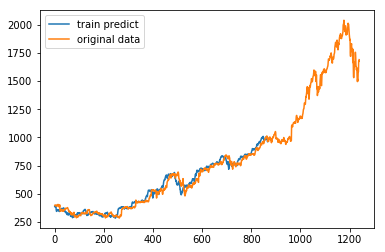

In [74]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(train_predict)
plt.plot(data5[0:1240])
plt.legend(['train predict','original data'],loc='upper left')
plt.show()

In [75]:
data5.shape

(1258, 1)

In [55]:
test_predict.shape

(372, 1)

In [76]:
train_predict.shape

(868, 1)

In [88]:
import math
train_score = math.sqrt(mean_squared_error(data5[0:868],train_predict[:]))
print("training error: %.2f" %(train_score))

training error: 36.60


In [89]:
import math
test_score = math.sqrt(mean_squared_error(data5[869:1241],test_predict[:]))
print("test error: %.2f" %(test_score))

test error: 194.21


In [87]:
data5[869:1241]

,data5
869,976.469971
870,964.169983
871,987.710022
872,995.169983
873,992.590027
874,1002.229980
875,1001.299988
876,1003.739990
877,993.979980
878,976.780029


In [86]:
print(test_predict)

[[ 992.4723 ]
 [ 996.847  ]
 [1005.46313]
 [1001.7232 ]
 [1003.9556 ]
 [1007.6707 ]
 [1022.3226 ]
 [1026.6138 ]
 [1029.3115 ]
 [1028.3641 ]
 [1036.6346 ]
 [1040.038  ]
 [1051.3326 ]
 [1041.0599 ]
 [1043.259  ]
 [1008.7801 ]
 [1005.8578 ]
 [ 997.4096 ]
 [ 995.5304 ]
 [ 994.85095]
 [ 996.6792 ]
 [ 996.1054 ]
 [ 994.3798 ]
 [ 974.69775]
 [ 976.63794]
 [ 980.6096 ]
 [ 983.97565]
 [ 984.8106 ]
 [ 970.1914 ]
 [ 966.85175]
 [ 959.6909 ]
 [ 969.6672 ]
 [ 966.4294 ]
 [ 961.71423]
 [ 951.30786]
 [ 950.7673 ]
 [ 959.0152 ]
 [ 967.5216 ]
 [ 976.67523]
 [ 977.4088 ]
 [ 970.94116]
 [ 968.7283 ]
 [ 974.76044]
 [ 969.0391 ]
 [ 976.46515]
 [ 977.1865 ]
 [ 995.051  ]
 [ 992.959  ]
 [ 992.3164 ]
 [ 977.3266 ]
 [ 973.1419 ]
 [ 973.851  ]
 [ 969.9614 ]
 [ 965.0878 ]
 [ 952.0753 ]
 [ 945.06464]
 [ 948.8291 ]
 [ 956.6652 ]
 [ 962.65784]
 [ 961.3595 ]
 [ 961.4504 ]
 [ 968.30896]
 [ 977.9432 ]
 [ 990.13635]
 [ 991.49274]
 [ 987.3769 ]
 [ 990.6248 ]
 [ 995.9762 ]
 [ 999.6345 ]
 [1002.7392 ]
 [1006.65533]
 [1000

In [56]:
train_predict.shape

(868, 1)

In [ ]:
test_pred

In [ ]:
test_predict

In [62]:
len(data_5)

1258

In [ ]:
data_5.columns = []

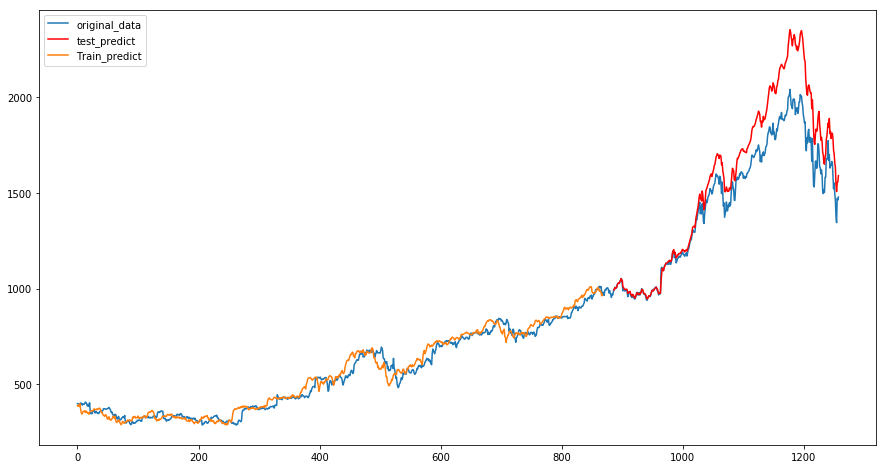

In [73]:
df_new =pd.DataFrame(data5)
df_new.columns = ['data5']

# Retrieve index values
new_index = df_new['data5'].tail(len(test_predict)).index

# Make a dataframe with your prediction values and your index
new_series = pd.DataFrame(index = new_index, data = test_predict)

# Merge the dataframes
df_new = pd.merge(df_new, new_series, how = 'left', left_index=True, right_index=True)
df_new.columns = ['data5', 'test_predict']

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(df_new['data5'])
plt.plot(df_new['test_predict'], color = 'red')
plt.plot(train_predict)
plt.legend(['original_data','test_predict','Train_predict'],loc='upper left')

plt.show()


In [ ]:
import math
train_score = math.sqrt(mean_squared_error())
print("training score: %.2f" %(train_score))